In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
data = pd.read_csv("res_dec16.csv",sep=";",names=["theta","t","SPC","LL","HL","DC"])

In [3]:
data

,theta,t,SPC,LL,HL,DC
0,0.1,1.00,0,0,0,0
1,0.1,1.02,0,0,0,0
2,0.1,1.04,0,0,0,0
3,0.1,1.06,0,0,0,0
4,0.1,1.08,0,0,6584,0
...,...,...,...,...,...,...
695,2.5,1.90,6327,6584,6584,6591
696,2.5,1.92,6327,6584,6584,6591
697,2.5,1.94,6327,6584,6584,6591
698,2.5,1.96,6327,6584,6584,6591


In [4]:
for i in ["SPC","LL","HL","DC"]:
    data[i] = (6594 - data[i]) / 6594

In [5]:
def data_smooth(data):
    to_be_smoothed = data[["SPC","LL","HL","DC"]]
    for index in range(len(to_be_smoothed)):
        if index > 0:
            for col in ["SPC","LL","HL","DC"]:
                if to_be_smoothed.iloc[index][col] > to_be_smoothed.iloc[index - 1][col]:
                    to_be_smoothed.iloc[index][col] = to_be_smoothed.iloc[index - 1][col]
    
    return to_be_smoothed

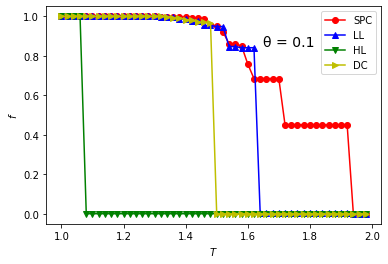

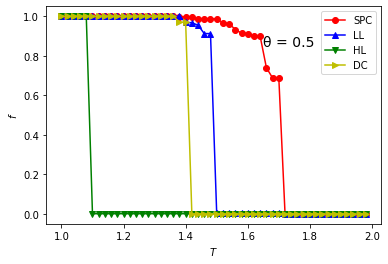

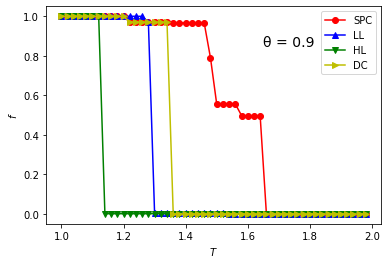

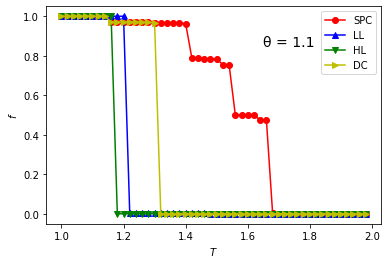

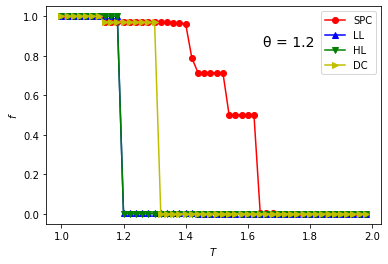

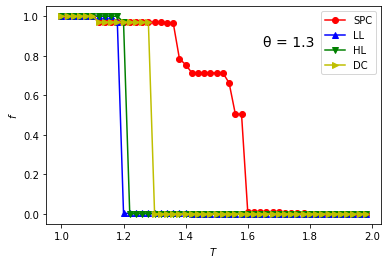

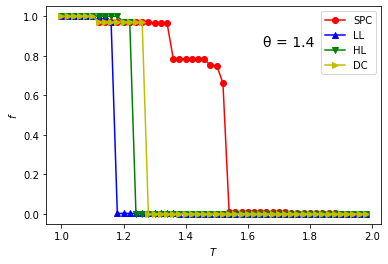

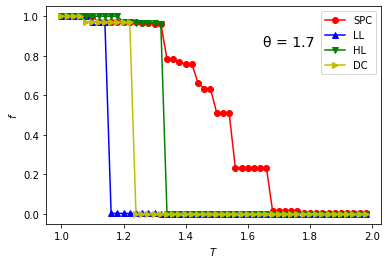

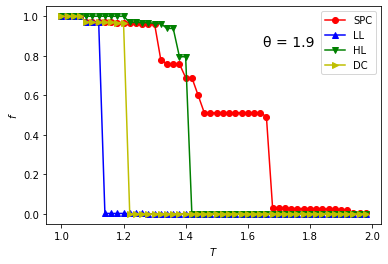

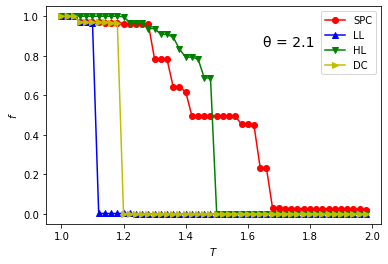

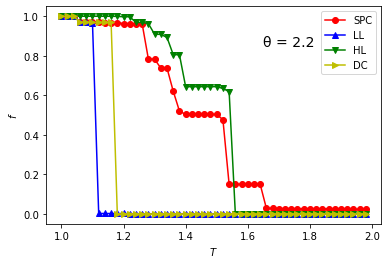

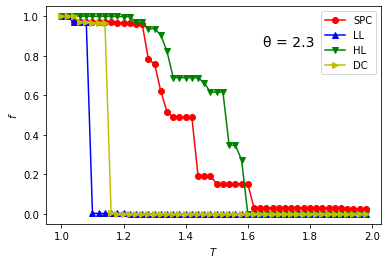

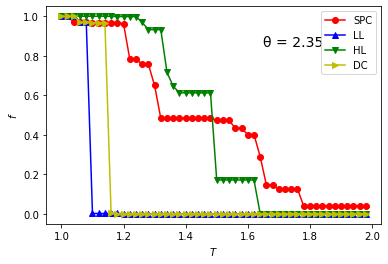

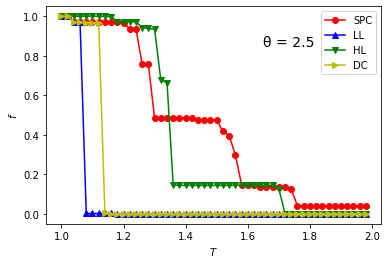

In [6]:
for theta in  [0.1,0.5,0.9,1.1,1.2,1.3,1.4,1.7,1.9,2.1,2.2,2.3,2.35,2.5]:
    d_plot = deepcopy(data[data["theta"] == theta])
    
    smooted_data = data_smooth(d_plot)
    plt.plot(d_plot['t'],smooted_data ["SPC"],color="r",marker="o",label = "SPC")
    plt.plot(d_plot['t'],smooted_data ["LL"],color="b",marker = "^",label = "LL")
    plt.plot(d_plot['t'],smooted_data ["HL"],color ="g",marker = "v",label="HL")
    plt.plot(d_plot['t'],smooted_data ["DC"],color ="y",marker = ">",label="DC")
    

    plt.xlabel("$T$")
    plt.ylabel("$f$")
    plt.text(1.65,0.85,f"\u03B8 = {theta}",fontsize = 14)
    plt.legend()
    plt.savefig(f'theta={theta}.png', dpi=300)
    plt.show()
    
    

In [7]:
t_c = []
for theta in  [0.1,0.5,0.9,1.1,1.2,1.3,1.4,1.7,1.9,2.1,2.2,2.3,2.35,2.5]:
    d_plot = deepcopy(data[data["theta"] == theta])
    temp = []
    for col in ["SPC","LL","HL","DC"]:
        for index in range(len(d_plot)-1,0,-1):
            if d_plot.iloc[index][col] - 0 >= 0.05:
                temp.append(d_plot.iloc[index]["t"])
                break
    t_c.append(temp)
    

In [8]:
t_c

[[1.92, 1.62, 1.06, 1.48],
 [1.7, 1.48, 1.08, 1.4],
 [1.64, 1.28, 1.12, 1.34],
 [1.66, 1.2, 1.16, 1.3],
 [1.62, 1.18, 1.18, 1.3],
 [1.58, 1.18, 1.2, 1.28],
 [1.56, 1.16, 1.22, 1.26],
 [1.66, 1.14, 1.32, 1.22],
 [1.66, 1.12, 1.4, 1.2],
 [1.66, 1.1, 1.48, 1.18],
 [1.64, 1.1, 1.54, 1.16],
 [1.6, 1.08, 1.58, 1.14],
 [1.76, 1.08, 1.62, 1.14],
 [1.74, 1.06, 1.7, 1.12]]

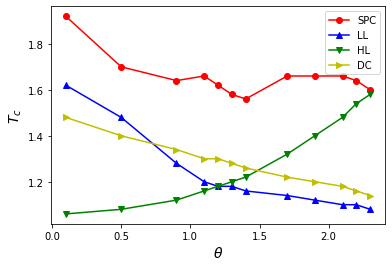

In [9]:
theta =  [0.1,0.5,0.9,1.1,1.2,1.3,1.4,1.7,1.9,2.1,2.2,2.3]


t_c = np.array(t_c)
plt.plot(theta,t_c[:-2,0],color="r",marker="o",label = "SPC")
plt.plot(theta,t_c[:-2,1],color="b",marker = "^",label = "LL")
plt.plot(theta,t_c[:-2,2],color ="g",marker = "v",label="HL")
plt.plot(theta,t_c[:-2,3],color ="y",marker = ">",label="DC")



plt.xlabel("$\u03B8$",fontsize =14)
plt.ylabel("$T_{c}$",fontsize = 14)
plt.legend()
plt.savefig(f'comparison.png', dpi=300)
plt.show()

In [51]:
data_ER = pd.read_csv("ER1.7.csv",sep=";",names=["theta","t","DC","SPC","LL","HL"])
data_BA = pd.read_csv("BA1.7.csv",sep=";",names=["theta","t","DC","SPC","LL","HL"])
for i in ["SPC","LL","HL","DC"]:
    data_ER[i] = 1 - data_ER[i]
    data_BA[i] = 1 - data_BA[i]

In [52]:
def singlePlot(data,name):
    d_plot = deepcopy(data)

    smooted_data = data_smooth(d_plot)
    plt.plot(d_plot['t'],smooted_data ["SPC"],color="r",marker="o",label = "SPC")
    plt.plot(d_plot['t'],smooted_data ["LL"],color="b",marker = "^",label = "LL")
    plt.plot(d_plot['t'],smooted_data ["HL"],color ="g",marker = "v",label="HL")
    plt.plot(d_plot['t'],smooted_data ["DC"],color ="y",marker = ">",label="DC")


    plt.xlabel("$T$")
    plt.ylabel("$f$")
    #plt.text(1.45,0.85,name,fontsize = 14)
    #plt.xscale("log")
#     plt.yscale("log")
    plt.legend()

    plt.title(name,fontsize = 16)
    plt.savefig(f'{name}.png', dpi=600)
    plt.show()
    

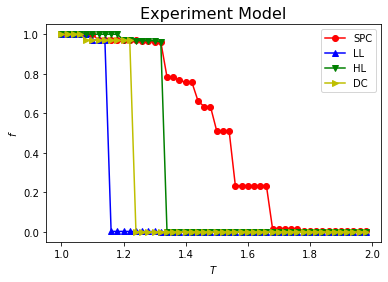

In [53]:
singlePlot(data[data["theta"] == 1.7],"Experiment Model")

C:\Users\1\AppData\Local\Temp\ipykernel_15704\1519126903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_smoothed.iloc[index][col] = to_be_smoothed.iloc[index - 1][col]


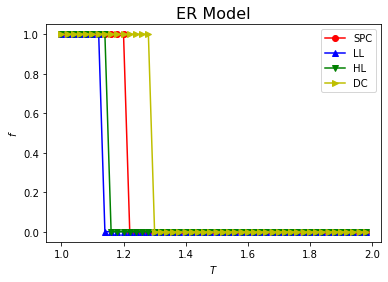

In [54]:
singlePlot(data_ER,"ER Model")

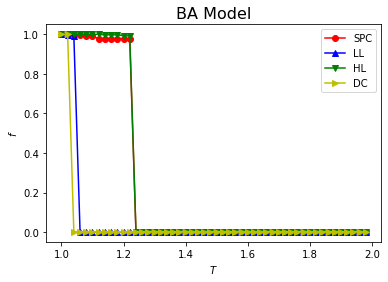

In [55]:
singlePlot(data_BA,"BA Model")